[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/149FPrQ8c-9KdhBT8FvY9gnEPLuFtDMhc?usp=sharing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.integrators import *

In [2]:
def H(z):
    q,p = z[:2],z[2:]
    q1,q2 = q[0], q[1]

    return q1**2/2 + np.cos(q2) + np.linalg.norm(p,axis=0,ord=2)**2/2

def U(q):
    q1,q2 = q[0], q[1]

    return q1**2/2 + np.cos(q2)

def K(p):
    np.linalg.norm(p,axis=0,ord=2)**2/2

def XH(t,z):
    q,p = z[:2],z[2:]
    q1,q2 = q[0],q[1]
    return np.hstack((p,-q1,np.sin(q2)))

def XU(t,z):
    q,p = z[:2],z[2:]
    q1,q2 = q[0],q[1]
    return np.hstack((np.zeros_like(p),-q1,np.sin(q2)))

def XK(t,z):
    q,p = z[:2],z[2:]
    return np.hstack((p,np.zeros_like(q)))

def symplecticEulerStep(z,h):
    zhat = z + h * XK(0,z)
    return zhat + h * XU(0,zhat)

def strangSplittingStep(z,h):
    zhat = z + h/2 * XK(0,z)
    ztilde = zhat + h * XU(0,zhat)
    return ztilde + h/2 * XK(0,ztilde)

In [3]:
T = 500
N = 5000
t_span = np.linspace(0,T,N+1)
h = t_span[1]-t_span[0]
y0 = np.array([1.,0.5,0,0.])

sol_SE = np.zeros((len(y0),N+1)) #Symplectic Euler
sol_SS = np.zeros((len(y0),N+1)) #Strang-Splitting
sol_RK45 = integrate_with_rk45(y0,XH,t_span,tol=1e-4) #Solution with RK45

sol_SE[:,0] = y0
sol_SS[:,0] = y0

for i in range(N):
    sol_SE[:,i+1] = symplecticEulerStep(sol_SE[:,i],h)
    sol_SS[:,i+1] = strangSplittingStep(sol_SS[:,i],h)


In [4]:
energy_SE = H(sol_SE)
energy_SS = H(sol_SS)
energy_RK45 = H(sol_RK45)
E0 = H(y0)

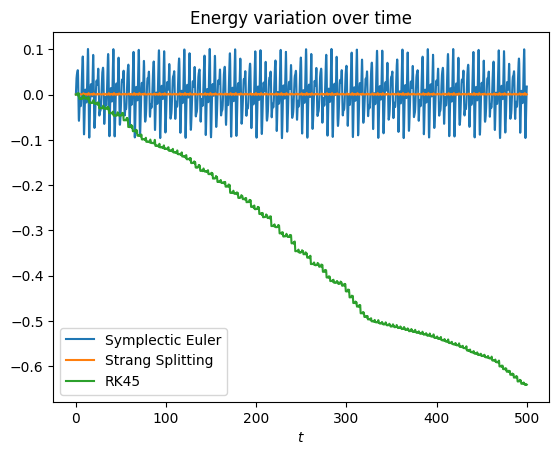

In [5]:
plt.plot(t_span,(energy_SE-E0),label="Symplectic Euler")
plt.plot(t_span,(energy_SS-E0),label="Strang Splitting")
plt.plot(t_span,(energy_RK45-E0),label="RK45")
plt.legend()
plt.xlabel(r"$t$")
plt.title("Energy variation over time")
plt.show();

# Check that the implemented maps are symplectic

In [8]:
#!pip install autograd

import autograd.numpy as np  # This is essential for autograd to work
from autograd import jacobian

# Define the function f: R^n -> R^m using autograd's numpy
def f(x):
    return np.array([x[0]**2 + x[1]**2, np.sin(x[0]) + np.cos(x[1])])

# Compute the Jacobian of f at a point
jacobian_f = jacobian(f)

# Evaluate the Jacobian at a specific point, e.g., x = [1.0, 2.0]
x = np.array([1.0, 2.0])
J = jacobian_f(x)

print("Jacobian at x =", x)
print(J)


Jacobian at x = [1. 2.]
[[ 2.          4.        ]
 [ 0.54030231 -0.90929743]]


In [9]:
def XH(t,z):
    q,p = z[:2],z[2:]
    q1,q2 = q[0],q[1]
    return np.hstack((p,-q1,np.sin(q2)))

def XU(t,z):
    q,p = z[:2],z[2:]
    q1,q2 = q[0],q[1]
    return np.hstack((np.zeros_like(p),-q1,np.sin(q2)))

def XK(t,z):
    q,p = z[:2],z[2:]
    return np.hstack((p,np.zeros_like(q)))

def symplecticEulerStep(z):
    zhat = z + h * XK(0,z)
    return zhat + h * XU(0,zhat)

def strangSplittingStep(z):
    zhat = z + h/2 * XK(0,z)
    ztilde = zhat + h * XU(0,zhat)
    return ztilde + h/2 * XK(0,ztilde)

jacobian_SE = jacobian(symplecticEulerStep)
jacobian_SS = jacobian(strangSplittingStep)
J_SE = jacobian_SE(y0)
J_SS = jacobian_SS(y0)

In [10]:
I2 = np.eye(2)
Z2 = np.zeros((2,2))
J_row1 = np.concatenate((Z2,I2),axis=1)
J_row2 = np.concatenate((-I2,Z2),axis=1)
J = np.concatenate((J_row1,J_row2),axis=0)

print("Is the implemented Symplectic Euler step symplectic? ","Yes" if np.allclose(J_SE.T@J@J_SE,J) else "No")
print("Is the implemented Strang splitting step symplectic? ","Yes" if np.allclose(J_SS.T@J@J_SS,J) else "No")

Is the implemented Symplectic Euler step symplectic?  Yes
Is the implemented Strang splitting step symplectic?  Yes
